In [21]:
import pandas as pd
%matplotlib inline
data = pd.read_csv('../data/exam/CM2.csv', na_values='?')
data = data.dropna(axis=0)
data.corr()

,MPG,N1,N2,N3,N4,N5,C1,C2
MPG,1.000000,-0.725807,-0.777639,-0.794165,-0.848245,0.262077,0.521834,0.497965
N1,-0.725807,1.000000,0.940013,0.811630,0.861470,-0.265433,-0.360366,-0.456219
N2,-0.777639,0.940013,1.000000,0.856358,0.923625,-0.275303,-0.345893,-0.563773
N3,-0.794165,0.811630,0.856358,1.000000,0.841027,-0.530584,-0.369380,-0.418450
N4,-0.848245,0.861470,0.923625,0.841027,1.000000,-0.130708,-0.368937,-0.537949
N5,0.262077,-0.265433,-0.275303,-0.530584,-0.130708,1.000000,0.148603,0.105721
C1,0.521834,-0.360366,-0.345893,-0.369380,-0.368937,0.148603,1.000000,0.133411
C2,0.497965,-0.456219,-0.563773,-0.418450,-0.537949,0.105721,0.133411,1.000000


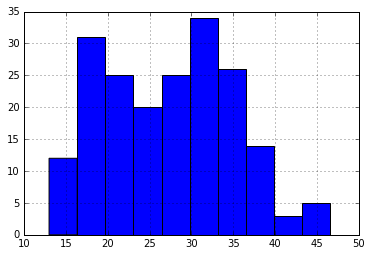

In [26]:
data['MPG'].hist()

In [22]:
from sklearn import preprocessing
def bin_feature(df, feature):
    binarizer = preprocessing.LabelBinarizer()
    nw = binarizer.fit_transform(df[feature])
    classes = binarizer.classes_
    new_names = list(map(lambda cls: feature + "==" + str(cls), classes))
    if len(binarizer.classes_) == 2:
        new_names = new_names[1:]
    new_data = pd.DataFrame(nw, columns=new_names)
    new_data.index = df.index
    new_data = pd.concat([df, new_data], axis=1)
    new_data = new_data.drop(feature, axis=1)
    return new_data

In [23]:
from sklearn import cross_validation
data = bin_feature(data, 'C1')
data = bin_feature(data, 'C2')
X = data.drop(['MPG'], axis=1)
Y = data['MPG']
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=11)

Best result: trees = 290, fail = 21.175906179356662


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C5C0CA588>]], dtype=object)

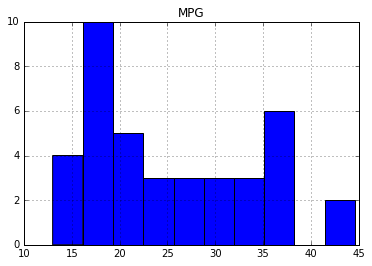

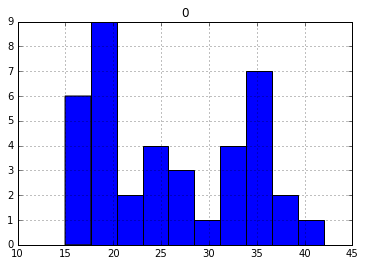

In [35]:
from sklearn import ensemble
import numpy as np
import math
best_tree = 10
best_score = 1000000000.
for tree_count in range(10, 500, 70):
    model = ensemble.RandomForestRegressor(n_estimators=tree_count, max_depth=8, random_state=11)
    model.fit(x_train, y_train)
    res = model.predict(x_test)
    fail = 0.
    for (r, w) in zip(res, y_test):
        fail += (r - w) * (r - w)     
    fail = math.sqrt(fail)
    if fail < best_score:
        best_tree = tree_count
        best_score = fail

print('Best result: trees = {}, fail = {}'. format(best_tree, best_score))
pd.DataFrame(data=y_test).hist()
pd.DataFrame(data=results[best_tree]).hist()